In [67]:
import torch
import torchvision
import pandas as pd
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import ConcatDataset
import torchvision
import PIL
from torch import nn
import matplotlib.pyplot as plt 
from torch.utils.data import WeightedRandomSampler
from collections import Counter
from matplotlib import pyplot as plt

In [68]:
dataset = ImageFolder(r"C:\0\Final_Year\FY_PROJECT\fish_data\train")

In [69]:
dataset

Dataset ImageFolder
    Number of datapoints: 3777
    Root location: C:\0\Final_Year\FY_PROJECT\fish_data\train

In [70]:
def show_images(dataset, num_samples = 40, cols = 10):
  plt.figure(figsize=(22, 22))
  for i, img in enumerate(dataset):
    if i == num_samples:
      break
    plt.subplot(int(num_samples/cols)+ 1, cols, i +1)
    plt.imshow(img[0])


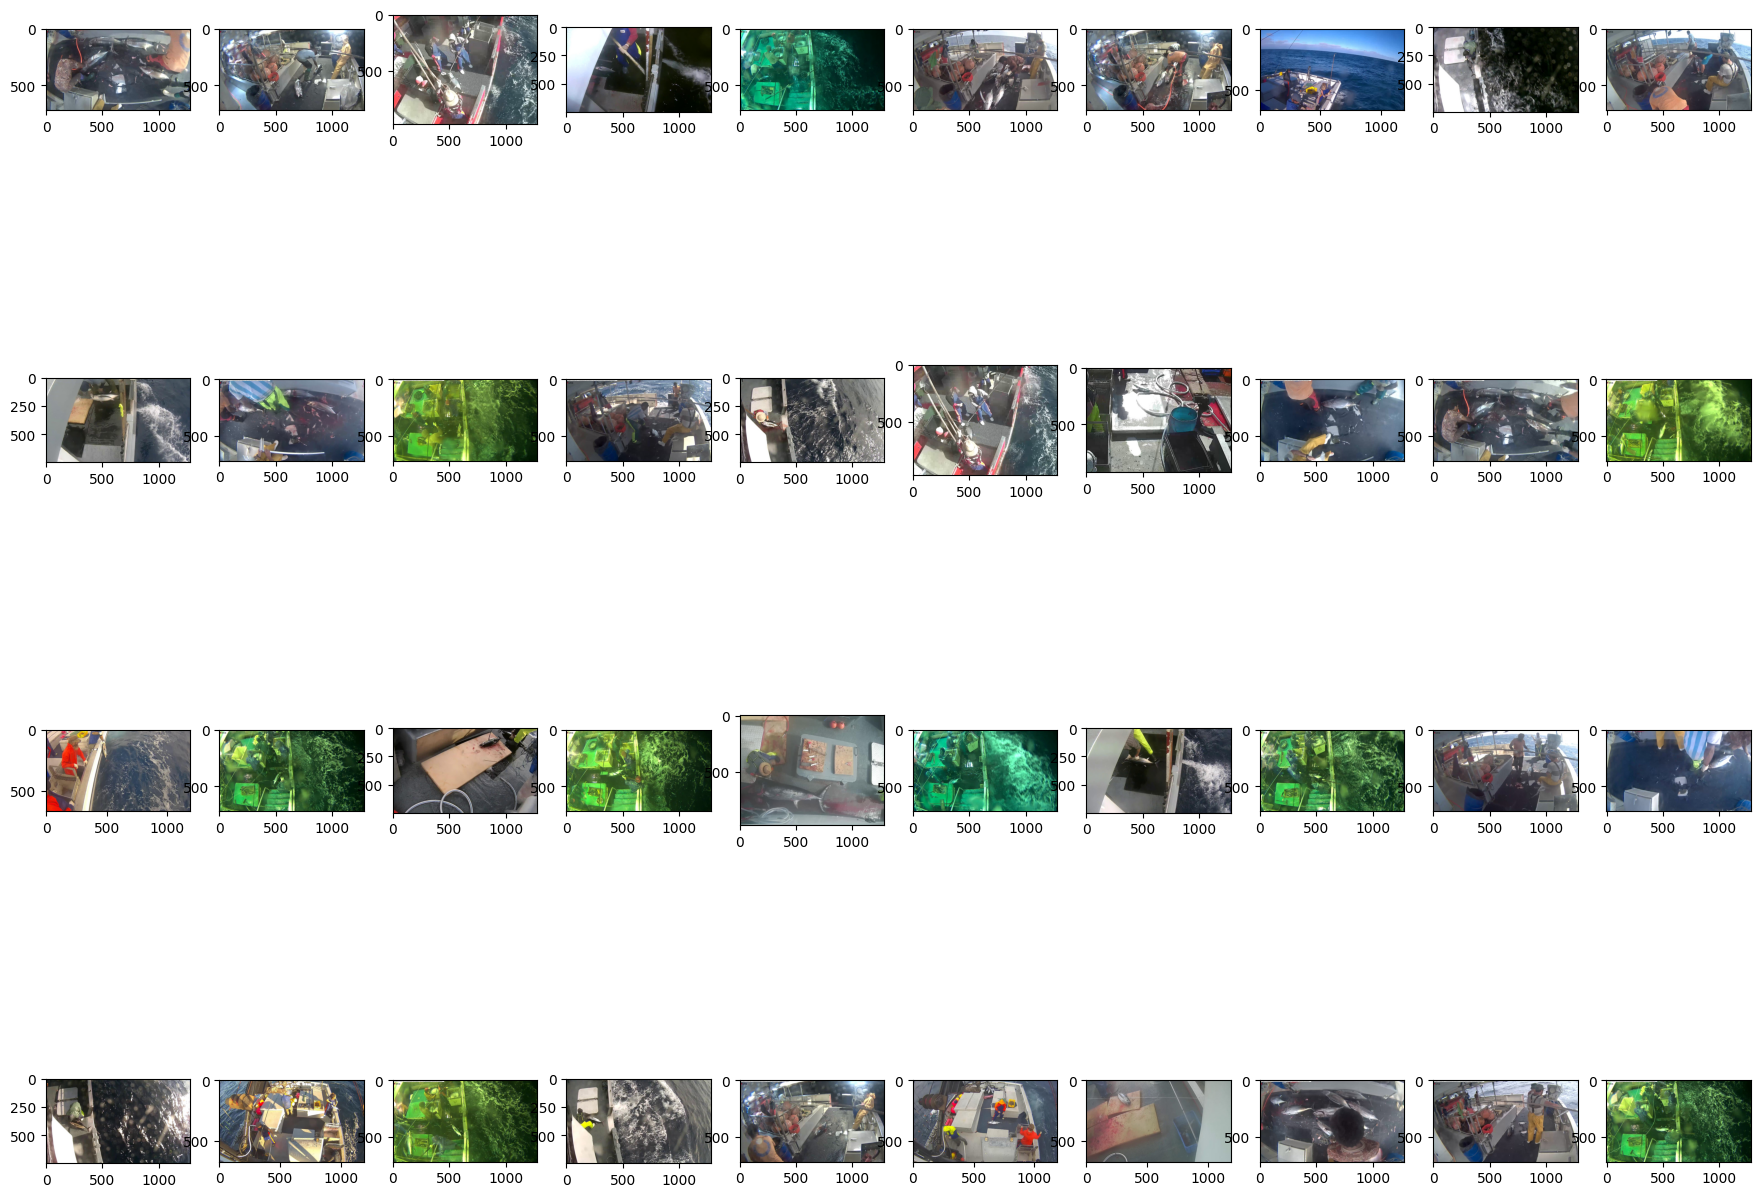

In [71]:
show_images(dataset)

In [72]:
IMG_SIZE_HEIGHT = 256
IMG_SIZE_WIDTH = 256
BATCH_SIZE = 32

In [73]:
data_transform_1 = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(size=(IMG_SIZE_HEIGHT, IMG_SIZE_WIDTH)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor(),
    # transforms.Lambda(lambda t: (t * 2) - 1)
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    # transforms.Lambda(lambda t: (t * 2) - 1)
])

In [74]:
data_transform_2 = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(size=(IMG_SIZE_HEIGHT, IMG_SIZE_WIDTH)),
    transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor(),
    # transforms.Lambda(lambda t: (t * 2) - 1)
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    # transforms.Lambda(lambda t: (t * 2) - 1)
])

In [75]:
data_transform_3 = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(size=(IMG_SIZE_HEIGHT, IMG_SIZE_WIDTH)),
    transforms.ColorJitter(),
    transforms.ToTensor(),
    # transforms.Lambda(lambda t: (t * 2) - 1)
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    # transforms.Lambda(lambda t: (t * 2) - 1)
])

In [76]:
data_transform_4 = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(size=(IMG_SIZE_HEIGHT, IMG_SIZE_WIDTH)),
    transforms.GaussianBlur((85, 205), 10),
    transforms.ToTensor(),
    # transforms.Lambda(lambda t: (t * 2) - 1)
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    # transforms.Lambda(lambda t: (t * 2) - 1)
])

In [77]:
data_transform_5 = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(size=(IMG_SIZE_HEIGHT, IMG_SIZE_WIDTH)),
    transforms.ToTensor(),
    # transforms.GaussianBlur((55, 55), 10),
    # transforms.Lambda(lambda t: (t * 2) - 1)
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    # transforms.Lambda(lambda t: (t * 2) - 1)
])

In [78]:
data_transform_6 = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(size=(IMG_SIZE_HEIGHT, IMG_SIZE_WIDTH)),
    transforms.RandomInvert(99),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    # transforms.Lambda(lambda t: (t * 2) - 1)

])

In [79]:
# def load_data(train_set, BATCH_SIZE):
#     train_classes = [label for _, label in train_set]
#     class_count = Counter(train_classes)
#     class_weights = torch.Tensor([len(train_classes)/c for c in pd.Series(class_count).sort_index().values]).to('cuda')
#     sample_weights = [0] * len(train_set)
#     for idx, (image, label) in enumerate(train_set):
#         class_weight = class_weights[label]
#         sample_weights[idx] = class_weight

#     sampler = WeightedRandomSampler(weights=sample_weights,
#                                     num_samples = len(train_set), replacement=True)  
#     train_loader = DataLoader(train_set, batch_size= BATCH_SIZE, sampler=sampler, num_workers=8)
#     return train_loader, class_weights

In [80]:
dataset_1 = ImageFolder(r"C:\Users\Bhushan\Desktop\dataset\fish_data\train", transform = data_transform_1)

In [81]:
# dataset_2 = ImageFolder(r"C:\Users\Bhushan\Desktop\dataset\fish_data\train", transform = data_transform_2)

In [82]:
dataset_3 = ImageFolder(r"C:\Users\Bhushan\Desktop\dataset\fish_data\train", transform = data_transform_3)

In [83]:
dataset_4 = ImageFolder(r"C:\Users\Bhushan\Desktop\dataset\fish_data\train", transform = data_transform_4)

In [84]:
dataset_5 = ImageFolder(r"C:\Users\Bhushan\Desktop\dataset\fish_data\test", transform = data_transform_5)

In [85]:
dataset_6 = ImageFolder(r"C:\Users\Bhushan\Desktop\dataset\fish_data\train", transform = data_transform_6)

In [86]:
dataset = ConcatDataset([dataset_1, dataset_3, dataset_4, dataset_6])

In [87]:
# dataset, sampler = load_data(dataset, BATCH_SIZE)

In [88]:
testloader = DataLoader(dataset_5, batch_size=BATCH_SIZE, num_workers = 8, shuffle=True)

In [89]:
next(iter(testloader))[0]

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -

In [90]:

class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
        
            torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1),
            torch.nn.MaxPool2d(kernel_size=2),
            nn.LayerNorm([32, 128, 128]),
            torch.nn.ELU(),
            torch.nn.Dropout(p=0.2),
            
            torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.MaxPool2d(kernel_size=2),
            nn.LayerNorm([64, 64, 64]),
            torch.nn.ELU(),
            torch.nn.Dropout(p=0.2),
                                     
            torch.nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1),
            torch.nn.MaxPool2d(kernel_size=2),
            nn.LayerNorm([128, 32, 32]),
            torch.nn.ELU(),
            torch.nn.Dropout(p=0.2),

            torch.nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding = 1),
            torch.nn.MaxPool2d(kernel_size=2),
            nn.LayerNorm([256, 16, 16]),
            torch.nn.ELU(),
            torch.nn.Dropout(p=0.2),

            torch.nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, padding = 1),
            torch.nn.MaxPool2d(kernel_size=2),
            nn.LayerNorm([256, 8, 8]),
            torch.nn.ELU(),
          
            
            torch.nn.Flatten(),
            torch.nn.Linear(16384, 16),
            torch.nn.ELU(),
            torch.nn.Linear(16, 8)
            
        )

    def forward(self, x):
        return self.model(x)

In [91]:
from torchsummary import summary

model = CNN()
summary(model, (3, 256, 256))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 8]                   --
|    └─Conv2d: 2-1                       [-1, 32, 256, 256]        896
|    └─MaxPool2d: 2-2                    [-1, 32, 128, 128]        --
|    └─LayerNorm: 2-3                    [-1, 32, 128, 128]        1,048,576
|    └─ELU: 2-4                          [-1, 32, 128, 128]        --
|    └─Dropout: 2-5                      [-1, 32, 128, 128]        --
|    └─Conv2d: 2-6                       [-1, 64, 128, 128]        18,496
|    └─MaxPool2d: 2-7                    [-1, 64, 64, 64]          --
|    └─LayerNorm: 2-8                    [-1, 64, 64, 64]          524,288
|    └─ELU: 2-9                          [-1, 64, 64, 64]          --
|    └─Dropout: 2-10                     [-1, 64, 64, 64]          --
|    └─Conv2d: 2-11                      [-1, 128, 64, 64]         73,856
|    └─MaxPool2d: 2-12                   [-1, 128, 32, 32]      

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 8]                   --
|    └─Conv2d: 2-1                       [-1, 32, 256, 256]        896
|    └─MaxPool2d: 2-2                    [-1, 32, 128, 128]        --
|    └─LayerNorm: 2-3                    [-1, 32, 128, 128]        1,048,576
|    └─ELU: 2-4                          [-1, 32, 128, 128]        --
|    └─Dropout: 2-5                      [-1, 32, 128, 128]        --
|    └─Conv2d: 2-6                       [-1, 64, 128, 128]        18,496
|    └─MaxPool2d: 2-7                    [-1, 64, 64, 64]          --
|    └─LayerNorm: 2-8                    [-1, 64, 64, 64]          524,288
|    └─ELU: 2-9                          [-1, 64, 64, 64]          --
|    └─Dropout: 2-10                     [-1, 64, 64, 64]          --
|    └─Conv2d: 2-11                      [-1, 128, 64, 64]         73,856
|    └─MaxPool2d: 2-12                   [-1, 128, 32, 32]      

In [92]:
torch.cuda.is_available()

True

In [27]:
# device = 'cuda'
# model = CNN().to(device)

# #Defining the model hyper parameters
# num_epochs = 120
# learning_rate = 0.00001
# weight_decay = 0.01
# criterion = torch.nn.CrossEntropyLoss(weight = torch.tensor(sampler).to('cuda'))
# optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# #Training process begins
# train_loss_list = list()
# test_loss_list = list()
# for epoch in range(num_epochs):
#     print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
#     train_loss = 0
#     test_loss = 0
#     #Iterating over the training dataset in batches
#     model.train()
#     for i, (images, labels) in enumerate(dataset):

#         #Extracting images and target labels for the batch being iterated
#         images = images.to(device)
#         labels = labels.to(device)

#         #Calculating the model output and the cross entropy loss
#         outputs = model(images)
#         loss = criterion(outputs, labels)

#         #Updating weights according to calculated loss
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#     #Printing loss for each epoch
#     train_loss_list.append(train_loss/len(dataset))
#     print(f"Training loss = {train_loss_list[-1]}")
#     torch.save({
#             # 'epoch': epochs,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             # 'train_loss_history': loss_history,
#             }, './model.pth')
#     with torch.inference_mode():
#         for i, (images, labels) in enumerate(testloader):

#             #Extracting images and target labels for the batch being iterated
#             images_test = images.to(device)
#             labels_test = labels.to(device)
    
#             #Calculating the model output and the cross entropy loss
#             outputs_test = model(images_test)
#             # print(labels, outputs, sep='\t')
#             loss = criterion(outputs_test, labels_test)
    
#             #Updating weights according to calculated loss
#             # optimizer.zero_grad()
#             # loss.backward()
#             # optimizer.step()
#             test_loss += loss.item()
#         test_loss_list.append(test_loss/len(testloader))
#         print(f"Test loss = {test_loss_list[-1]}")


# #Plotting loss for all epochs


NameError: name 'sampler' is not defined

Text(0, 0.5, 'Training loss')

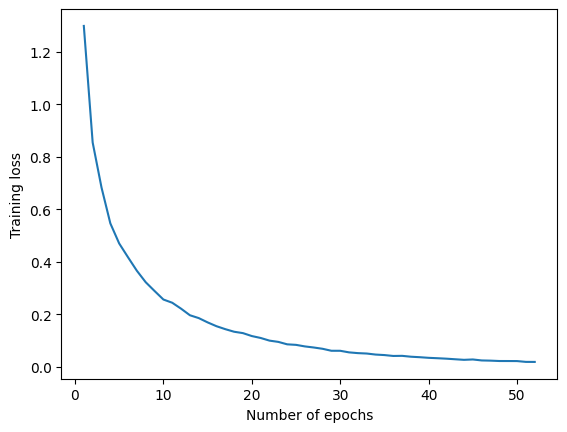

In [143]:
plt.plot(range(1,53), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

Text(0.5, 0, 'Number of epochs')

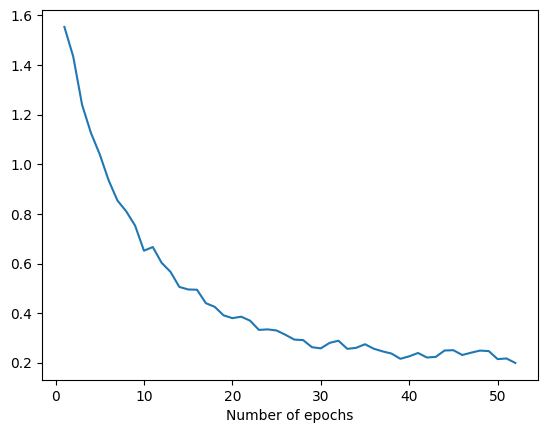

In [144]:
plt.plot(range(1,53), test_loss_list)
plt.xlabel("Number of epochs")


In [93]:
result = next(iter(testloader))[0]

In [94]:
cpkt = torch.load("./model.pth")['model_state_dict']
# opt = torch.load("./model.pth")['optimizer_state_dict']
device = 'cuda'
model = CNN().to(device)
model.load_state_dict(cpkt)


<All keys matched successfully>

In [95]:
res = next(iter(testloader))[0][0].to('cuda')

In [96]:
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]
device = 'cuda'
mean = torch.tensor(mean).to(device)
std = torch.tensor([std]).to(device)
(images, labels) = next(iter(testloader))
outputs_test = list()
y_true = list()
y_pred = list()
with torch.inference_mode():
    for i, (images, labels) in enumerate(testloader):
        images_test = images.to(device)
        labels_test = labels.to(device)
        for it in list(labels_test.cpu()):
            y_true.append(int(it))
        
        outputs_test = model(images_test)
        for it in list(torch.argmax(outputs_test, dim=1).cpu()):
            y_pred.append(int(it))
 
        print('True Label', labels_test)
        
        print('Pred Label', torch.argmax(outputs_test, dim=1))
        # print(outputs_test)
       

True Label tensor([6, 7, 0, 7, 1, 1, 7, 4, 1, 6, 0, 0, 3, 7, 4, 1, 5, 5, 4, 7, 7, 0, 7, 7,
        0, 0, 0, 4, 0, 0, 4, 1], device='cuda:0')
Pred Label tensor([6, 4, 0, 7, 1, 1, 7, 4, 1, 6, 0, 0, 3, 7, 4, 1, 5, 5, 4, 7, 7, 0, 7, 7,
        0, 0, 0, 4, 0, 0, 4, 1], device='cuda:0')
True Label tensor([0, 4, 7, 4, 7, 4, 4, 4, 6, 0, 0, 7, 5, 0, 0, 5, 0, 0, 4, 3, 7, 7, 7, 7,
        0, 7, 0, 0, 6, 4, 7, 0], device='cuda:0')
Pred Label tensor([5, 4, 7, 4, 7, 4, 7, 4, 6, 0, 0, 7, 5, 1, 0, 5, 0, 0, 4, 3, 7, 7, 7, 7,
        0, 7, 0, 0, 6, 4, 1, 7], device='cuda:0')
True Label tensor([5, 0, 2, 5, 1, 7, 0, 4, 0, 0, 7, 0, 1, 0, 0, 6, 7, 0, 0, 5, 0, 6, 7, 0,
        0, 0, 5, 5, 0, 0, 4, 0], device='cuda:0')
Pred Label tensor([5, 0, 2, 5, 1, 7, 0, 4, 0, 0, 7, 7, 1, 0, 0, 6, 7, 0, 0, 5, 0, 6, 7, 0,
        0, 0, 5, 5, 0, 7, 4, 0], device='cuda:0')
True Label tensor([4, 0, 7, 5, 7, 0, 7, 0, 4, 5, 6, 7, 7, 1, 6, 1, 7, 0, 7, 7, 7, 0, 4, 0,
        7, 0, 1, 6, 5, 5, 3, 5], device='cuda:0')
Pred Label te

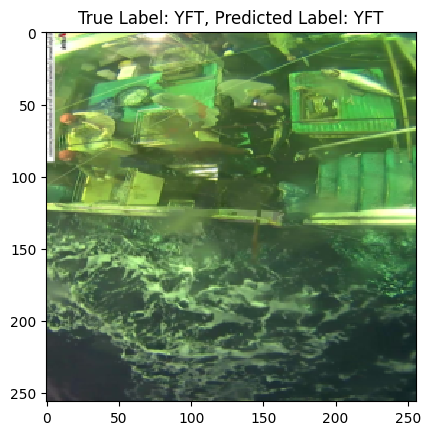

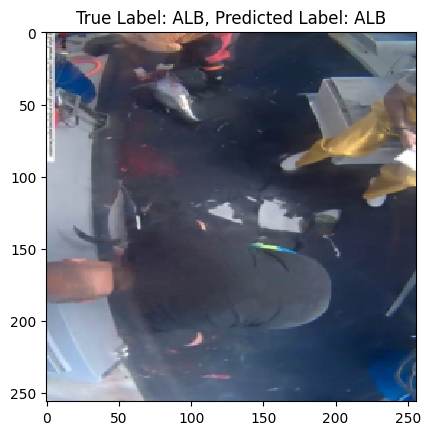

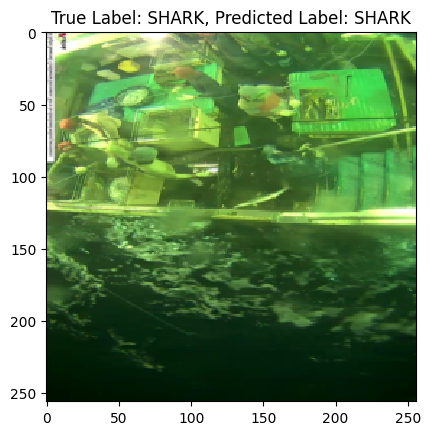

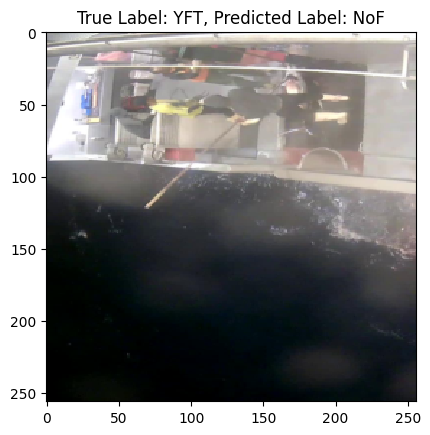

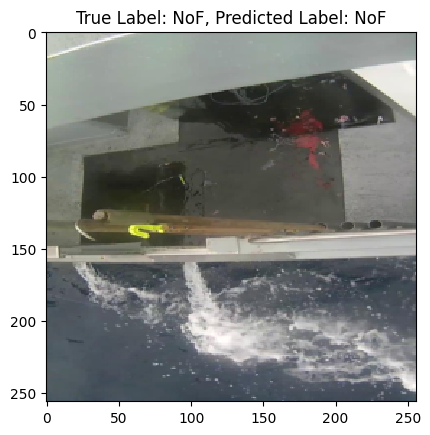

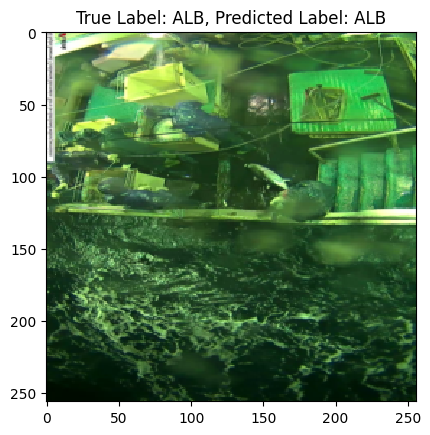

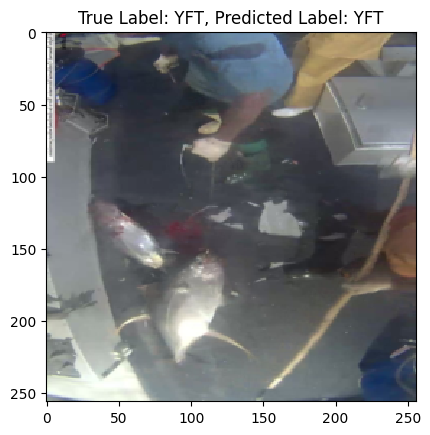

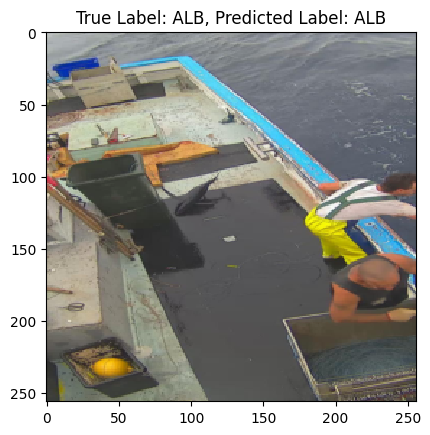

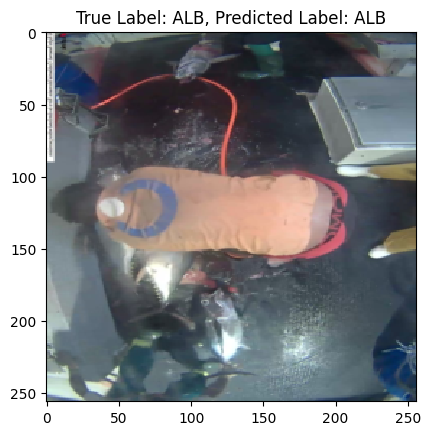

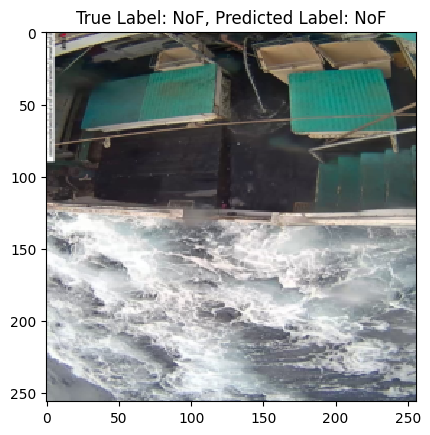

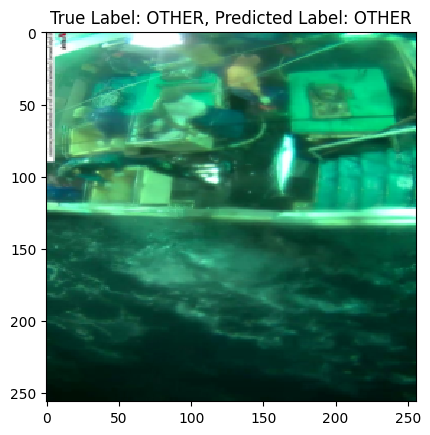

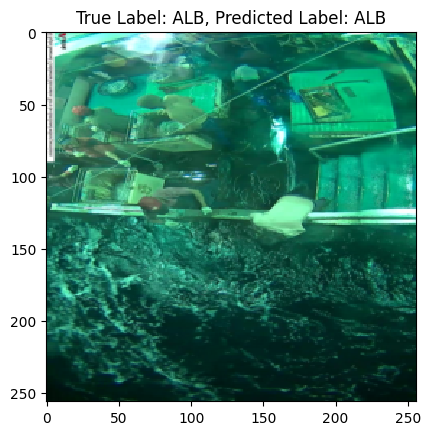

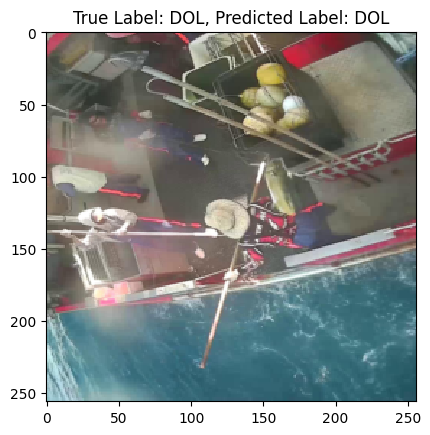

In [97]:
map_ = {0: 'ALB', 1: 'BET', 2: 'DOL', 3: 'LAG', 4: 'NoF', 5: 'OTHER', 6: 'SHARK', 7: 'YFT'}
for i, j, k in zip(images_test, labels_test, outputs_test): 
    image = (i * 0.5 + 0.5).to('cuda')
    image = image.permute(2, 1, 0).cpu().numpy()
    plt.imshow(image, interpolation='nearest')
    plt.title(f"True Label: {map_[int(j.cpu().numpy())]}, Predicted Label: {map_[int(torch.argmax(k).cpu().numpy())]}") 
    plt.show()

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       171
           1       0.88      0.95      0.92        40
           2       0.96      1.00      0.98        23
           3       0.92      0.92      0.92        13
           4       0.92      0.94      0.93        93
           5       0.83      1.00      0.91        59
           6       0.98      1.00      0.99        44
           7       0.93      0.95      0.94       146

    accuracy                           0.93       589
   macro avg       0.92      0.95      0.94       589
weighted avg       0.93      0.93      0.93       589



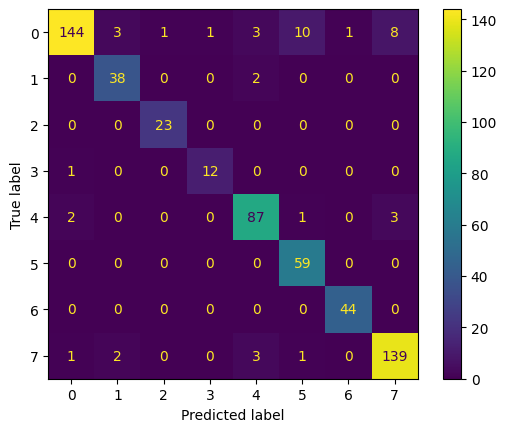

In [98]:

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_true, y_pred))


[Text(0, 0.5, 'ALB'),
 Text(0, 1.5, 'BET'),
 Text(0, 2.5, 'DOL'),
 Text(0, 3.5, 'LAG'),
 Text(0, 4.5, 'NoF'),
 Text(0, 5.5, 'OTHER'),
 Text(0, 6.5, 'SHARK'),
 Text(0, 7.5, 'YFT')]

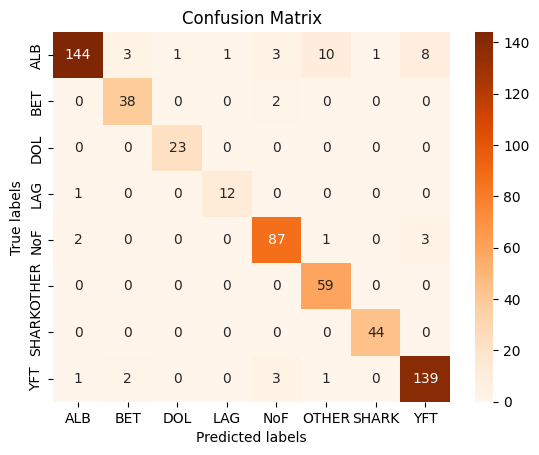

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt    

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap= 'Oranges')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']) 
ax.yaxis.set_ticklabels(['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT'])

In [100]:
from explainable_cnn import CNNExplainer
from torchvision import models
import matplotlib.pyplot as plt

In [101]:
x_cnn = CNNExplainer(model, {0: 'ALB', 1: 'BET', 2: 'DOL', 3: 'LAG', 4: 'NoF', 5: 'OTHER', 6: 'SHARK', 7: 'YFT'})

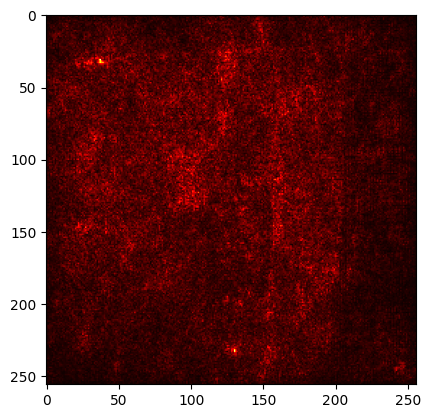

In [122]:
saliency_map = x_cnn.get_saliency_map(
    r"C:\Users\Bhushan\Desktop\dataset\fish_data\test\ALB\img_00901.jpg",
    'ALB',
    (256, 256)
)
plt.imshow(saliency_map, cmap="hot")
plt.show()

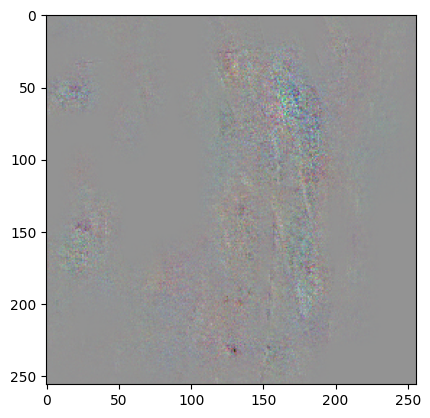

In [125]:
guided_grad_cam = x_cnn.get_guided_grad_cam(
     r"C:\Users\Bhushan\Desktop\dataset\fish_data\test\ALB\img_00901.jpg",
    'ALB',
    (256, 256),
    ['model.20']
)

plt.imshow(guided_grad_cam[0].astype('uint8'))
plt.show()

In [106]:
print([n for n, _ in model.named_modules()])

['', 'model', 'model.0', 'model.1', 'model.2', 'model.3', 'model.4', 'model.5', 'model.6', 'model.7', 'model.8', 'model.9', 'model.10', 'model.11', 'model.12', 'model.13', 'model.14', 'model.15', 'model.16', 'model.17', 'model.18', 'model.19', 'model.20', 'model.21', 'model.22', 'model.23', 'model.24', 'model.25', 'model.26', 'model.27']


In [107]:
!git clone https://github.com/ashutosh1919/explainable-cnn.git

fatal: destination path 'explainable-cnn' already exists and is not an empty directory.


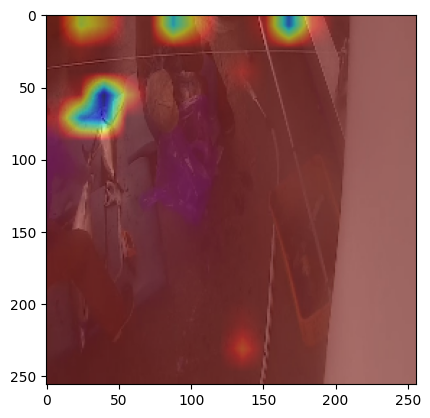

In [126]:
grad_cam = x_cnn.get_grad_cam(
    r"C:\Users\Bhushan\Desktop\dataset\fish_data\test\ALB\img_00901.jpg",
    6,
    (256, 256),
    ['model.20']  # List of layer names for which you want to generate image.
)

# Note that get_grad_cam() returns list of images (numpy array)
plt.imshow(grad_cam[0].astype('uint8'))


In [54]:
from explainable_cnn import CNNExplainer
from torchvision import models
import matplotlib.pyplot as plt

In [55]:
from torchsummary import summary

model = CNN()
summary(model, (3, 256, 256))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 8]                   --
|    └─Conv2d: 2-1                       [-1, 32, 256, 256]        896
|    └─MaxPool2d: 2-2                    [-1, 32, 128, 128]        --
|    └─LayerNorm: 2-3                    [-1, 32, 128, 128]        1,048,576
|    └─ELU: 2-4                          [-1, 32, 128, 128]        --
|    └─Dropout: 2-5                      [-1, 32, 128, 128]        --
|    └─Conv2d: 2-6                       [-1, 64, 128, 128]        18,496
|    └─MaxPool2d: 2-7                    [-1, 64, 64, 64]          --
|    └─LayerNorm: 2-8                    [-1, 64, 64, 64]          524,288
|    └─ELU: 2-9                          [-1, 64, 64, 64]          --
|    └─Dropout: 2-10                     [-1, 64, 64, 64]          --
|    └─Conv2d: 2-11                      [-1, 128, 64, 64]         73,856
|    └─MaxPool2d: 2-12                   [-1, 128, 32, 32]      

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 8]                   --
|    └─Conv2d: 2-1                       [-1, 32, 256, 256]        896
|    └─MaxPool2d: 2-2                    [-1, 32, 128, 128]        --
|    └─LayerNorm: 2-3                    [-1, 32, 128, 128]        1,048,576
|    └─ELU: 2-4                          [-1, 32, 128, 128]        --
|    └─Dropout: 2-5                      [-1, 32, 128, 128]        --
|    └─Conv2d: 2-6                       [-1, 64, 128, 128]        18,496
|    └─MaxPool2d: 2-7                    [-1, 64, 64, 64]          --
|    └─LayerNorm: 2-8                    [-1, 64, 64, 64]          524,288
|    └─ELU: 2-9                          [-1, 64, 64, 64]          --
|    └─Dropout: 2-10                     [-1, 64, 64, 64]          --
|    └─Conv2d: 2-11                      [-1, 128, 64, 64]         73,856
|    └─MaxPool2d: 2-12                   [-1, 128, 32, 32]      

In [56]:
x_cnn = CNNExplainer(model, {0: 'ALB', 1: 'BET', 2: 'DOL', 3: 'LAG', 4: 'NoF', 5: 'OTHER', 6: 'SHARK', 7: 'YFT'})

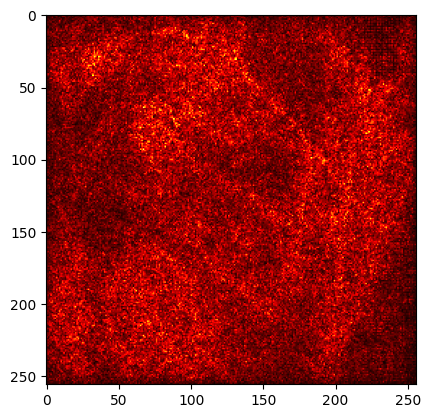

In [57]:
saliency_map = x_cnn.get_saliency_map(
    r"C:\Users\Bhushan\Desktop\dataset\fish_data\test\ALB\img_04308.jpg",
    'ALB',
    (256, 256)
)
plt.imshow(saliency_map, cmap="hot")
plt.show()

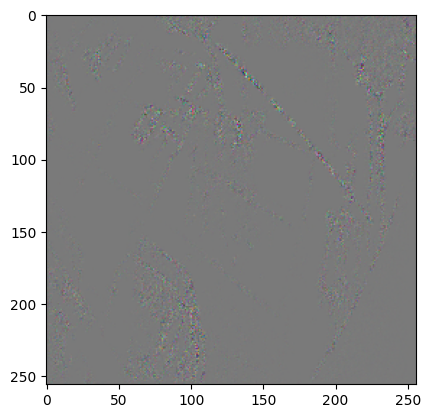

In [64]:
guided_grad_cam = x_cnn.get_guided_grad_cam(
      r"C:\Users\Bhushan\Desktop\dataset\fish_data\test\ALB\img_04308.jpg",
    'ALB',
    (256, 256),
    ['model.5']
)

plt.imshow(guided_grad_cam[0].astype('uint8'))
plt.show()

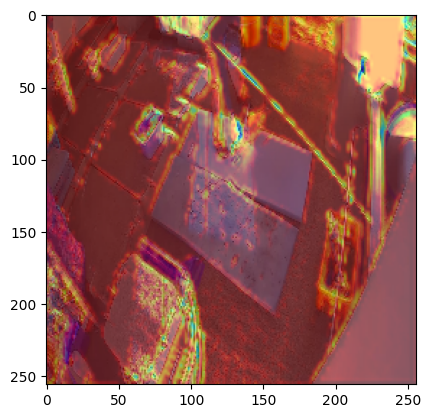

In [66]:
grad_cam = x_cnn.get_grad_cam(
     r"C:\Users\Bhushan\Desktop\dataset\fish_data\test\ALB\img_04308.jpg",
    'ALB',
    (256, 256),
    ['model.5']  # List of layer names for which you want to generate image.
)

# Note that get_grad_cam() returns list of images (numpy array)
plt.imshow(grad_cam[0].astype('uint8'))
plt.show()